Назва проекту: ***Розфарбовування чорно-білого зображення за допомогою нейронної мережі***.

Мета: Метою цього проекту є розробка та реалізація нейронної мережі для автоматичного розфарбовування чорно-білих зображень.

*В проекті показано як нейронна мережа може бути навчена на наборі зображень та використана для колоризації інших чорно-білих зображень.*

In [84]:
import numpy as np
import os
from PIL import Image
import random
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import warnings


In [85]:
warnings.filterwarnings("ignore")

In [86]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.models import Sequential
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
from google.colab import drive


In [87]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
# Load and preprocess the image
image = Image.open('/content/gdrive/MyDrive/Project/Yuliia4.jpg')
image = image.resize((400, 400))  # Resize the image if needed
image = np.array(image, dtype=float) / 255.0
X = rgb2lab(image)[:, :, 0]
Y = rgb2lab(image)[:, :, 1:] / 128.0

In [89]:
# Reshape the arrays
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [90]:
# Print the shapes for verification
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (1, 400, 400, 1)
Y shape: (1, 400, 400, 2)


In [91]:
# Build the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [76]:
# Compile and train the model
model.compile(optimizer='rmsprop', loss='mse')
print(model.summary())
model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, None, None, 8)     80        
                                                                 
 conv2d_37 (Conv2D)          (None, None, None, 8)     584       
                                                                 
 conv2d_38 (Conv2D)          (None, None, None, 16)    1168      
                                                                 
 conv2d_39 (Conv2D)          (None, None, None, 16)    2320      
                                                                 
 conv2d_40 (Conv2D)          (None, None, None, 32)    4640      
                                                                 
 conv2d_41 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 up_sampling2d_12 (UpSamplin  (None, None, None, 32)  

In [92]:
# Output colorizations
output = model.predict(X)
output *= 128

1/1 [==============================] - 0s 299ms/step


In [93]:
# Reshape the output arrays
output = output.reshape((400, 400, 2))
cur = np.zeros((400, 400, 3))
cur[:, :, 0] = X[0][:, :, 0]
cur[:, :, 1:] = output


In [94]:
# Convert Lab to RGB
result = lab2rgb(cur)

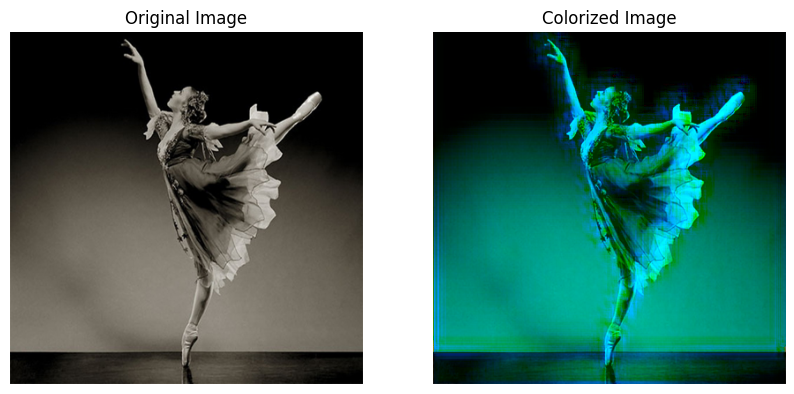

In [95]:
# Display the original and colorized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(result)
axes[1].set_title('Colorized Image')
axes[1].axis('off')
plt.show()